<a href="https://colab.research.google.com/github/team-epoch/EPOCH_4th_TASK/blob/main/4th_TASK/DevelopTeam/Practice/week4/4%EA%B8%B0_%EC%9D%B4%EC%A7%80%EC%9C%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 10 XGBoost
> 커플 성사 여부 예측하기

✅ **부스팅 알고리즘**
> 랜덤 포레스트에서는 각각의 트리를 독립적으로, 즉 서로 관련 없이 만드는 반면, 부스팅 알고리즘에서는 트리를 순차적으로 만들면서 이전 트리에서 학습한 내용이 다음 트리를 만들 때 반영됨

✅ **XGBoost**
> 부스팅 알고리즘은 트리 모델을 기반으로 한 최신 알고리즘 중 하나로, 랜덤 포레스트보다 훨씬 빠른 속도와 더 좋은 예측 능력을 보여줌

> XGBoost는 손실 함수뿐만 아니라 모형 복잡도까지 고려함

👍🏻**장점**
* 예측 속도가 상당히 빠르며, 예측력 또한 좋음
* 변수 종류가 많고 데이터가 클수록 상대적으로 뛰어난 성능을 보여줌

👎🏻**단점**
* 복잡한 모델인 만큼, 해석에 어려움이 있음
* 더 나은 성능을 위한 하이퍼파라미터 튜닝이 까다로움

💡**유용한 곳**
* 종속변수가 연속형 데이터인 경우든 범주형 데이터인 경우든 모두 사용할 수 있음
* 이미지나 자연어가 아닌 표로 정리된 데이터의 경우, 거의 모든 상황에 활용할 수 있음

## 10.2 라이브러리 및 데이터 불러오기, 데이터 확인하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/dating.csv'
data = pd.read_csv(file_url)

In [2]:
data.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,...,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,...,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,...,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,...,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,...,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1


In [3]:
pd.options.display.max_columns = 40 # 총 30개 컬럼까지 출력되도록 설정

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   int64  
 1   gender                         8378 non-null   object 
 2   age                            8283 non-null   float64
 3   age_o                          8274 non-null   float64
 4   race                           8315 non-null   object 
 5   race_o                         8305 non-null   object 
 6   importance_same_race           8299 non-null   float64
 7   importance_same_religion       8299 non-null   float64
 8   pref_o_attractive              8289 non-null   float64
 9   pref_o_sincere                 8289 non-null   float64
 10  pref_o_intelligence            8289 non-null   float64
 11  pref_o_funny                   8280 non-null   float64
 12  pref_o_ambitious               8271 non-null   f

* `has_null` : 변수 중 `Null` 값이 있는지 여부
* `age` / `age_o` : 본인 나이 / 상대방 나이
* `race` / `race_o` : 본인 인종 / 상대방 인종
* `importance_same_race` / `importance_same_religion` : 인종과 종교를 중요시 여기는 지에 대한 응답
* `attractive(매력적인)`, `sincere(성실한)`, `intelligence(지적)`, `funny(재미난)`, `ambitious(야심찬)`, `shared_interests(공통관심사)` : 이 항목들은 4가지 관점에서 평가되어 총 변수가 24(6x4)개임
  * `pref_o_xxx` : 상대방이 xxx 항목을 얼마나 중요하게 생각하는가에 대한 응답
  * `xxx_o` : 상대방이 본인에 대한 xxx 항목을 평가한 항목
  * `xxx_important` : xxx 항목에 대해 본인이 얼마나 중요하게 생각하는가에 대한 응답
  * `xxx_partner` : 본인이 상대방에 대한 xxx 항목을 평가한 항목
* `interests_correlate` : 관심사(취미 등) 연관도
* `expected_happy_with_sd_people` : 스피드 데이팅을 통해 만난 사람과 함께할 때 얼마나 좋을지에 대한 기대치
* `expected_num_interested_in_me` : 얼마나 많은 사람이 나에게 관심을 보일지에 대한 기대치
* `like` : 파트너가 마음에 들었는지 여부
* `guess_prob_liked` : 파트너가 나를 마음에 들어했을지에 대한 예상
* `met` : 파트너를 스피드 데이팅 이벤트 이전에 만난 적이 있는지 여부

In [5]:
round(data.describe(), 2)

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00,8283.00,8274.00,8299.00,8299.00,8289.00,8289.00,8289.00,8280.00,8271.00,8249.00,8166.00,8091.00,8072.00,8018.00,7656.00,7302.00,8299.00,8299.00,8299.00,8289.00,8279.00,8257.00,8176.00,8101.00,8082.00,8028.00,7666.00,7311.00,8220.00,8277.00,1800.00,8138.00,8069.00,8003.00,8378.00
mean,0.87,26.36,26.36,3.78,3.65,22.50,17.40,20.27,17.46,10.69,11.85,6.19,7.18,7.37,6.40,6.78,5.47,22.51,17.40,20.27,17.46,10.68,11.85,6.19,7.18,7.37,6.40,6.78,5.47,0.20,5.53,5.57,6.13,5.21,0.05,0.16
std,0.33,3.57,3.56,2.85,2.81,12.57,7.04,6.78,6.09,6.13,6.36,1.95,1.74,1.55,1.95,1.79,2.16,12.59,7.05,6.78,6.09,6.12,6.36,1.95,1.74,1.55,1.95,1.79,2.16,0.30,1.73,4.76,1.84,2.13,0.28,0.37
min,0.00,18.00,18.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.83,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,24.00,24.00,1.00,1.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,-0.02,5.00,2.00,5.00,4.00,0.00,0.00
50%,1.00,26.00,26.00,3.00,3.00,20.00,18.37,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,20.00,18.18,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,0.21,6.00,4.00,6.00,5.00,0.00,0.00
75%,1.00,28.00,28.00,6.00,6.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,0.43,7.00,8.00,7.00,7.00,0.00,0.00
max,1.00,55.00,55.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.50,10.00,10.00,11.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.00,10.00,10.00,10.00,10.00,10.00,0.91,10.00,20.00,10.00,10.00,8.00,1.00


* 평가 관련 변수 - `xxx_o`, `xxx_partner` : 0~10점까지 개별 항목에 적용
* 중요도 관련 변수 - `pref_o_xxx`, `xxx_important` : 총 100점을 각 항목에 분배해 적용

## 10.3 전처리 : 결측치 처리

In [6]:
data.isna().mean()

,0
has_null,0.000000
gender,0.000000
age,0.011339
age_o,0.012413
race,0.007520
race_o,0.008713
importance_same_race,0.009429
importance_same_religion,0.009429
pref_o_attractive,0.010623
pref_o_sincere,0.010623


In [7]:
data.isna().mean()

,0
has_null,0.000000
gender,0.000000
age,0.011339
age_o,0.012413
race,0.007520
race_o,0.008713
importance_same_race,0.009429
importance_same_religion,0.009429
pref_o_attractive,0.010623
pref_o_sincere,0.010623


* 중요도 관련 변수 → 결측치 제거
* 평가 점수 관련 변수 → 무응답(결측치)을 하나의 응답 종류로 간주

In [8]:
data = data.dropna(subset=['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
                           'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_important', 'sincere_important',
                           'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important']) # 일부 변수에서 결측치 제거

In [9]:
data = data.fillna(-99) # 남은 결측치는 -99로 대체

선형 모델에서는 -99로 결측치를 채웠을 때 해당 숫자가 아웃라이어로써 작용하겠지만,

트리 모델에서는 결측치라는 사실 자체가 유의미한 차이를 보인다면 -99를 분류하는 노드가 생겨날 것

## 10.4 전처리 : 피처 엔지니어링

* 나이차(`age_gap`)

In [10]:
def age_gap(x):  # 함수 정의
    if x['age'] == -99:                 # age가 -99면
        return -99                    # -99 리턴
    elif x['age_o'] == -99:             # age_o가 -99면
        return -99                    # -99 리턴
    elif x['gender'] == 'female':       # gender가 female이면
        return x['age_o'] - x['age']  #age_o에서 age를 뺀 값 리턴
    else:        # 나머지 경우는
        return x['age'] - x['age_o']  # age에서 age_o를 뺀 값 리턴

남녀 중 한 명이라도 나이가 -99이면 -99 반환

그렇지 않으면 남자가 연상이면 +, 여자가 연상이면 - 값 반환

In [11]:
data['age_gap'] = data.apply(age_gap, axis = 1) # age_gap 변수에 age_gap 함수 적용

In [12]:
data['age_gap_abs'] = abs(data['age_gap']) # 절댓값 적용(나이 차이 자체)

* 인종 동일 여부(`same_race`)

In [13]:
def same_race(x): # 함수 정의
    if x['race'] == -99:           # race가 -99면
        return -99   # -99 리턴
    elif x['race_o'] == -99:       # race_o가 -99면
        return -99   # -99 리턴
    elif x['race'] == x['race_o']: # race와 race_o가 같으면
        return 1     # 1 리턴
    else:    # 나머지 경우는
        return -1    # -1 리턴

In [14]:
data['same_race'] = data.apply(same_race, axis=1)
# data를 same_race 함수에 적용하여 결과를 same_race 변수로 저장

* 동일 인종 중요도 점수(`same_race_point`)

In [15]:
def same_race_point(x):        # 함수 정의
    if x['same_race'] == -99:  # same_race가 -99면
        return -99             # -99 리턴
    else:   # 나머지 경우는
        return x['same_race'] * x['importance_same_race']
        # same_race와 importance_same_race의 곱을 리턴

In [16]:
data['same_race_point'] = data.apply(same_race_point, axis=1)
# data에 same_race_point 함수를 적용한 결과를 same_race_point 변수로 저장

* 동일 인종 여부가 중요(10) * 동일 인종이 아님(0) = 0

* 동일 인종 여부가 중요x(0) * 동일 인종(1) = 0

두 가지 경우를 구별하기 위해 동일 인종이 아닐 경우 -1 부여

* 평가 점수 x 중요도(`rating`)

In [17]:
def rating(data, importance, score): # 함수 정의
    if data[importance] == -99:      # importance가 -99면
        return -99            # -99 리턴
    elif data[score] == -99:         # score가 -99면
        return -99            # -99 리턴
    else:     # 나머지 경우는
        return data[importance] * data[score] # importance와 score의 곱을 리턴

In [18]:
data.columns[8:14] # 컬럼의 8자리부터 14 이전 자리까지 출력

Index(['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests'],
      dtype='object')

In [25]:
partner_imp = data.columns[8:14]      # 상대방의 중요도
partner_rate_me = data.columns[14:20] # 본인에 대한 상대방의 평가
my_imp = data.columns[20:26]          # 본인의 중요도
my_rate_partner = data.columns[26:32] # 상대방에 대한 본인의 평가

Index(['attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o'],
      dtype='object')

In [23]:
# 상대방 관련 새 변수 이름을 저장하는 리스트
new_label_partner = ['attractive_p', 'sincere_partner_p', 'intelligence_p', 'funny_p', 'ambition_p', 'shared_interests_p']

# 본인 관련 새 변수 이름을 저장하는 리스트
new_label_me = ['attractive_m', 'sincere_partner_m', 'intelligence_m', 'funny_m', 'ambition_m', 'shared_interests_m']

* 상대방 관련 변수(`xxx_p`)

In [26]:
for i,j,k in zip(new_label_partner, partner_imp, partner_rate_me):
    data[i] = data.apply(lambda x: rating(x, j, k), axis=1)
# rating 함수 적용 결과를 i 변수에 저장

* 본인 관련 변수(`xxx_m`)

In [27]:
for i,j,k in zip(new_label_me, my_imp, my_rate_partner):
    data[i] = data.apply(lambda x: rating(x, j, k), axis=1)
# rating 함수 적용 결과를 i 변수에 저장

* `object` 타입 변수 더미변수화(`gender`, `race`, `race_o`)

In [28]:
data = pd.get_dummies(data, columns=['gender', 'race', 'race_o'], drop_first=True)
# 더미 변수로 변환

## 10.5 모델링 및 평가

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('match', axis=1), data['match'],
                                                    test_size=0.2, random_state=100)

In [30]:
import xgboost as xgb

In [31]:
model = xgb.XGBClassifier(n_estimators = 500, max_depth = 5, random_state = 100)

In [32]:
model.fit(X_train, y_train) # 학습

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [33]:
pred = model.predict(X_test) # 예측
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, pred) # 정확도

0.8640836408364083

*매칭된 경우가 약 16%인 데이터의 특성상, 모델링 없이 모든 경우를 0으로만 예측해도 84%의 정확도가 나올 수 있기 때문에 에측 모델이 없는 것보다 아주 조금 나은 수준*

In [34]:
print(confusion_matrix(y_test, pred)) # 혼동 행렬 출력

[[1289   76]
 [ 145  116]]


In [35]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1365
           1       0.60      0.44      0.51       261

    accuracy                           0.86      1626
   macro avg       0.75      0.69      0.72      1626
weighted avg       0.85      0.86      0.86      1626



$$ \text{Precision} = \frac{TP}{TP+FP} = \frac{\text{양성을 양성으로 판단}}{\text{양성으로 판단한 수}} $$

1로 예측한 경우 중, 얼마만큼이 실제로 1인지 → 1종 오류와 관련

$$ \text{Recall} = \frac{TP}{TP+FN} = \frac{\text{양성을 양성으로 판단}}{\text{실제로 양성인 수}} $$

실제로 1중에, 얼마만큼을 1로 예측했는지 → 2종 오류와 관련

$$ \text{F1-score} =2\times \frac{\text{Precision}\times\text{Recall}}{\text{Precision}+\text{Recall}}$$

정밀도와 재현율의 조화평균

둘의 값이 비슷할수록 더 높은 값을 보여줌

✅ 1종 오류가 중요하면 정밀도에, 2종 오류가 중요하면 재현율에 더욱 신경 써야 함

특별히 더 중요한 오류 유형이 없다면 F1-score 점수를 보는 게 무난한 방법

## 10.6 이해하기 : 경사하강법

> 경사 부스팅의 핵심 개념 중 하나로, 모델이 어떻게 최소 오차가 되는 매개변수들을 학습하는지에 대한 방법

> 오차식에 대한 미분계수를 통해 매개변수의 이동 방향과 보폭을 결정함

> 보폭은 매개변수를 얼만큼씩 이동할지를 의미

## 10.7 하이퍼파라미터 튜닝: 그리드 서치
> 그리드 서치에 입력할 하이퍼파라미터 후보들을 입력하면, 각 조합에 대해 모두 모델링해보고 최적의 결과가 나오는 하이퍼파라미터 조합을 알려줌

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
parameters = {
              'learning_rate': [0.01, 0.1, 0.3],
              'max_depth': [5, 7, 10],
              'subsample' : [0.5, 0.7, 1],
              'n_estimators' : [300, 500, 1000]
              } # 하이퍼파라미터 셋 정의

* `learning_rate` : 학습률. 경사하강법에서 '매개변수'를 얼만큼씩 이동해가면서 최소 오차를 찾을지, 그 보폭의 크기를 결정하는 하이퍼파라미터
* `max_depth` : 각 트리의 깊이 제한
* `subsample` : 모델을 학습시킬 때 일부 데이터만 사용하여 각 트리를 만듦
* `n_estimators` : 전체 나무의 개수

In [38]:
model = xgb.XGBClassifier()

In [39]:
gs_model = GridSearchCV(model, parameters, n_jobs=-1, scoring='f1', cv=5)

In [40]:
gs_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [300, 500, 1000],
                         'subsample': [0.5, 0.7, 1]},
             scoring='f1')

In [41]:
gs_model.best_params_ # 최적의 하이퍼파라미터 출력

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1}

In [ ]:
pred = gs_model.predict(X_test) # 예측

*그리드 서치를 이용한 새로운 데이터 예측*

최적의 하이퍼파라미터 조합이 자동 반영

In [42]:
accuracy_score(y_test, pred)

0.8640836408364083

In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1365
           1       0.60      0.44      0.51       261

    accuracy                           0.86      1626
   macro avg       0.75      0.69      0.72      1626
weighted avg       0.85      0.86      0.86      1626



정확도는 아주 미세하게 증가, F1-점수는 0.02 상승

*일반적으로 하이퍼파라미터튜닝으로 엄청난 개선을 얻기는 쉽지 않음*

## 10.8 중요 변수 확인

> XGBoost에 내장된 함수로 변수의 중요도 파악 가능

그러나 그리드 서치로 학습된 모델에서는 사용할 수 없으므로 최적의 하이퍼파라미터 조합으로 재학습 필요

In [44]:
model = xgb.XGBClassifier(learning_rate=0.3, max_depth=5,
                          n_estimators=1000, subsample=0.5, random_state=100)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [45]:
feature_imp = pd.DataFrame({'features' : X_train.columns, 'values' : model.feature_importances_})

In [46]:
feature_imp.head()

,features,values
0,has_null,0.027826
1,age,0.012322
2,age_o,0.011165
3,importance_same_race,0.010638
4,importance_same_religion,0.014685


<Axes: xlabel='values', ylabel='features'>

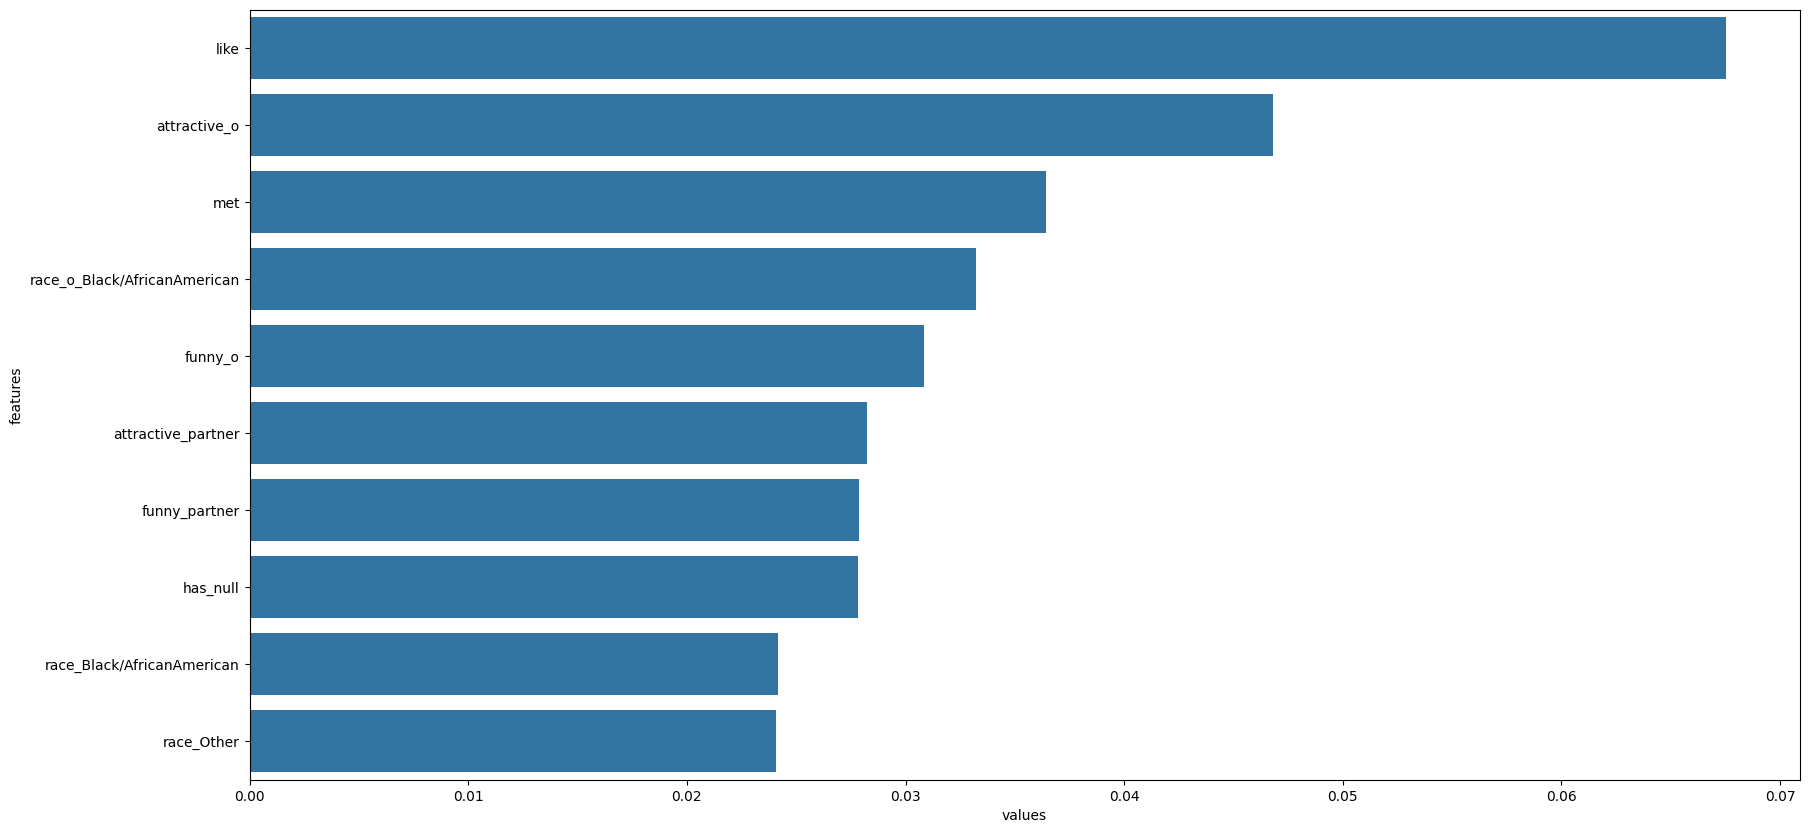

In [47]:
plt.figure(figsize=(20,10))
sns.barplot(x='values', y='features',
            data=feature_imp.sort_values(by='values', ascending=False).head(10)) # 내림차순 정렬(상위10개)

✅**변수 중요도**
* 선형회귀/로지스틱 회귀: 계수 부호와 크기
* 결정 트리: 노드를 나누는 기준

XGBoost에서 나타나는 values는 상대적인 중요도를 계산한 것으로 직관적으로 이해하기 어렵고, 긍/부정을 나타내지 않으므로 해석에 유의

## 10.9 이해하기 : XGBoost

### 10.9.1 배깅
> 배깅은 부트스트랩(bootstrap) 훈련셋을 사용하는 트리 모델
>
> 부트스트랩은 데이터의 일부분을 무작위로 반복 추출하는 방법

### 10.9.2 부스팅과 에이다부스트
> 랜덤포레스트는 각 트리를 만들 때 이전에 만든 트리와 상관없이 새로운 데이터 부분집합과 변수 부분집합을 이용하지만, 부스팅은 각 트리를 순차적으로 만들면서 이전 트리의 정보를 이용함

> 부스팅의 대표 알고리즘인 에이다부스트(AdaBoost)는 단계적으로 트리를 만들 때 이전 단계에서의 분류 결과에 따라 각 데이터에 가중치를 부여/수정함

e.g. 이전 트리에서 가중치가 덜 부요되고 잘못 분류된 데이터들에 더 높은 가중치를 부여

### 10.9.3 경사 부스팅과 XGBoost
> 경사 부스팅은 경사하강법을 이용하여, 이전 모델의 에러를 기반으로 다음 트리를 만들어감

* 경사부스팅으로 구현한 알고리즘 : XGBoost, LightGBM, Catboost 등

## 🤔 Question
* 에이다부스트는 가중치가 잘못 부여된 데이터들에 가중치를 수정하여 부여하는 것이고, 경사부스팅은 모델의 에러를 기반으로 다음 트리를 만들어간다고 한다. 그런데 가중치가 잘못 부여된 것도 일종의 '에러'가 아닌가? 경사부스팅에서 말하는 에러가 에이다부스트의 잘못 부여된 가중치와 어떻게 다른거지?